## Back Face Culling

`depth buffering` 이 원하는 결과를 생성했지만, 우리는 더 빠른 결과를 얻을 수 있다.   

큐브의 각 픽셀이 올바른 색으로 칠해졌지만, 각 픽셀은 여러번 색칠되었다.   
예를 들어, 큐브의 앞면이 렌더링 되기 전 뒷 면과 같이 많은 픽셀들이 여러번 색칠된다. 

우리는 픽셀당 1/z 를 계산해왔는데, 우리는 조명과 같은 추가적인 요소를 더할것이다.   
수행해야 하는 각 픽셀별 계산이 늘어날수록, 절대 보이지 않을 픽셀의 계산이 낭비가 될 것이다.   

우리는 계산 이전에 일찍 픽셀을 무시할 수 있을까?   
우리는 렌더링을 시작하기 전에 사용되지 않는 삼각형을 제외할 수 있다.   

지금까지 우리는 `front faces` 와 `back faces` 에 대해 이야기했다.   
모든 삼각형이 두개의 면을 지닌다고 생각하자. 삼각형의 두 면이 동시에 보이는 것은 불가능하다.
두개의 면을 구별하기 위해, 우리는 표면에 수직인 가상의 화살표를 붙일것이다.   
그렇다면 우리는 모든 화살표가 밖을 향해있는 아래와 같은 큐브를 얻을 것이다. 

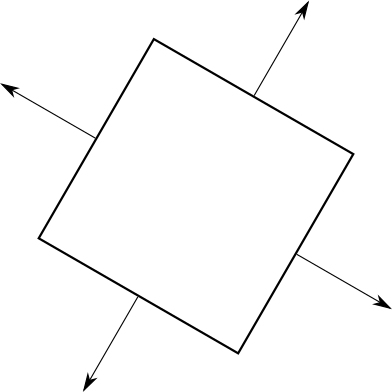   


화살표들은 카메라쪽을 가리킬지, 카메라와 떨어진 곳을 가르킬지에 따라 우리에게 `앞` 인지 `뒤` 인지를 구별할 수 있게 한다.   

일반적으로, `view vector` 와 `this arraow`(normal of triangle) 이 90도 이하이면 `front-facing` 이고, 90도가 넘어간다면 `back-facing` 이다.    

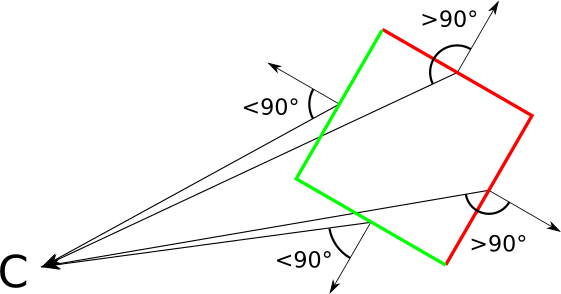

이 부분에서, 우리는 우리의 3D 모델에 제한을 두어야 한다. 우리의 모델은 `closed` 되어있다.   
닫힌 모델의 정확한 정의는 꽤 어려운데, 직관적인 이해만으로 충분하다.     
우리가 사용하는 큐브는 닫혀있다,
우리는 큐브의 외관만을 볼 수 있다.   

만약 우리가 큐브의 한 면을 지운다면, 우리가 안쪽을 볼 수 있기 때문에 닫혀있지 않을 것이다.   
그렇다고 해서 오목한 물체나 구멍이 있는 물체를 가질 수 없다는 말은 아니다.   
얆은 벽으로 모델을 만들었을 것이다.   

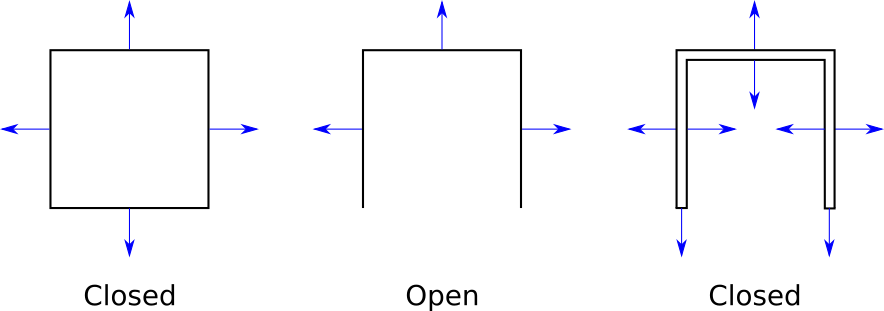

왜 `closed` 제한을 강조할까?   
닫힌 오브젝트는 닫힌 오브젝트는 흥미로운 특성을 가지고 있는데, 이것은 모델이나 카메라의 위치에 관계 없이 `front faces` 가 `back faces` 를 덮고 있다는 것이다.   
이것은 우리가 `back faces` 를 그릴 필요가 없고, 계산 시간을 줄일 수 있다는 것을 의미한다.   

우리는 모든 `back faces` 를 무시(cull) 하기 때문에, 이 알고리즘을 `back face culling` 이라고 부른다.   

수도 코드는 매우 간단하지만, 우리의 렌더링 시간을 반이나 줄여 준다! 


``` 

CullBackFaces(object, camera){
    for T in object.triangles{
        if T is back-facing{
            remove T from object.triangles
        }
    }
}
```

## Classifying Triangles

삼각형의 법선 벡터 $\vec{N}$과 삼각형의 점부터 카메라까지의 벡터 $\vec{V}$ 가 있다고 가정한다.   

우리는 $\vec{N}$이 물체의 외부를 가르킨다고 가정한다.   
삼각형을 `front-facing` 과 `back-facing`으로 구분하기 위해, 우리는  $\vec{N}$과  $\vec{V}$ 사이의 각이 90도 안쪽인지 계산한다.   

우리는 내적의 속성을 이용하여 이것을 쉽게 만들 수 있다.   
$\alpha$ 는  $\vec{N}$과  $\vec{V}$ 사이의 각이다.   

$\frac{\langle  \vec{N},\vec{V} \rangle}{ |\vec{N}| |\vec{V}|} = cos(\alpha) $

$cos(\alpha)$ 는 $|\alpha| \leq 90^\circ$ 에 대해 음수가 아니기 때문에, 우리는 `front-facing` 과 `back-facing` 을 구분하기 위해 이 표현의 부호만 알면 된다.   

$|\vec{N}| |\vec{V}|$ 는 항상 양수이기 때문에, 이는 우리는 이를 신경쓰지 않아도 된다.   
따라서 

$sign(\langle  \vec{N},\vec{V} \rangle) = sign(cos(\alpha))$
이다.  


아래와 같이 분류를 간단하게 할 수 있다.   

$\langle  \vec{N},\vec{V} \rangle \leq 0 $  - back-facing    
$\langle  \vec{N},\vec{V} \rangle \geq 0 $  - front-facing


$\langle  \vec{N},\vec{V} \rangle  = 0 $  인 경우는 우리는 삼각형의 방향의 측면을 바라보고, 삼각형과 카메라가 같은 평면에 존재할 때이다.   

우리는 이 삼각형을 back-facing, front-facing 으로 분류할 수 있지만, 그려지지 않을 삼각형을 피하기 위해 back-facing으로 그리기로 선택하였다.   



우리는 어떻게 법선 벡터를 구할 수 있을까?   

우리는 벡터의 외적(cross product)을 이용하여 두 벡터에 수직인 벡터를 생성할 수 있다.  
삼각형 표면의 두 벡터를 외적하면, 삼각형의 법선 벡터를 얻을 수 있다.   
우리는 삼각형에서 각 꼭짓점을 뺌으로 두개의 벡터를 쉽게 얻을 수 있다.   

삼각형 ABC의 법선 벡터의 방향(direction of normal vector)을 계산하는 것은 간단하다.    

$\vec{V}_1 = B - A$
$\vec{V}_2 = C - A$
$\vec{N} = \vec{V}_1 - \vec{V}_2$

법선 벡터의 방향(direction of normal vector) 은 정규벡터(normal vector)와 같지 않다. 
두 가지 이유가 있는데, 먼저 $|\vec{N}|$ 는 1일 필요가 없다.   
$\vec{N}$ 을 정규화 하는 것은 사소하고, 우리는 $\langle  \vec{N},\vec{V} \rangle $ 의 부호만 생각하기 때문에 중요하지 않다.   

두번째 이유는, 만약 $\vec{N}$가 정규화된 법선벡터이면, $-\vec{N}$도 같기 때문에, front-facing 과 back-facing 을 구분하기 위한 정확한 방법이기 때문에 우리는 $\vec{N}$ 이 가리키는 방향에 집중해야 한다.   

게다가 두 벡터의 외적은 동일하지 않다.   
$\vec{V}_1 \times \vec{V}_2 = -(\vec{V}_1 \times \vec{V}_2)$    
즉, 외적에서 벡터의 순서가 중요하다.    
우리는 $V_1$ 과 $V_2$ 를 A,B,C 로 정의하였는데 이것은 삼각형 꼭짓점의 순서가 중요하다는 것을 의미한다.   

다행히 외적의 정의, $V_1$ 과 $V_2$를 정의하는 방식, 우리가 사용할 좌표계를 고려할 때, 정규 벡터의 방향을 구하는 간단한 방법이 있다.   
카메라에서 삼각형의 꼭짓점을 바라볼 때, 시계방향으로 놓여 있다면, 법선벡터는 카메라 쪽을 향하게 된다. 이는 카메라가 삼각형의 front face 를 바라보는 것이다.   

In [12]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
import copy

In [13]:
def rotation_matrix(orientation):
    x_rotate = np.array([[1, 0, 0, 0],
                   [0, math.cos(math.pi * orientation[0] / 180), (math.sin(math.pi * orientation[0] / 180)), 0],
                   [0, -(math.sin(math.pi * orientation[0] / 180)), math.cos(math.pi * orientation[0] / 180), 0],
                    [0, 0, 0, 1]])
    y_rotate = np.array([[math.cos(math.pi * orientation[1] / 180),0,-(math.sin(math.pi * orientation[1] / 180)), 0],
               [0, 1, 0, 0],
               [(math.sin(math.pi * orientation[1] / 180)), 0, math.cos(math.pi * orientation[1] / 180), 0],
                [0, 0, 0, 1]])
    z_rotate = np.array([[math.cos(math.pi * orientation[2] / 180), (math.sin(math.pi * orientation[2] / 180)), 0, 0],
               [-(math.sin(math.pi * orientation[2] / 180)), math.cos(math.pi * orientation[2] / 180), 0, 0],
               [0, 0, 1, 0],
                [0, 0, 0, 1]])
    
    return np.dot(np.dot(x_rotate, y_rotate), z_rotate)

def translate_matrix(position):
    return np.array([[1, 0, 0, position[0]],
                   [0, 1, 0, position[1]],
                   [0, 0, 1, position[2]],
                   [0, 0, 0, 1]])

def scale_matrix(scale):
    return np.array([[scale, 0, 0, 0],
                    [0, scale, 0, 0],
                    [0, 0, scale, 0],
                    [0, 0, 0, 1]])

In [14]:
class Point:
    def __init__(self, x, y, h, color=[255,255,255]):
        self.x = x
        self.y = y
        self.h = h
        self.color = color
        
class Vertex:
    def __init__(self, x, y, z):
        self.x = x
        self.y = y
        self.z = z
        
class Vertex4:
    def __init__(self, x, y, z, w):
        self.x = x
        self.y = y
        self.z = z
        self.w = w

class Triangle:
    def __init__(self, v1,v2,v3,color = (255,255,255)):
        self.v = [v1,v2,v3]
        self.color = color
        
class Camera:
    def __init__(self,
                 position = [0,0,0],
                 orientation = [0,0,0],
                 viewport_size = 1,
                 projection_plane_z = 1
                 ):
        
        self.position = position
        self.orientation = orientation
        self.viewport_size = viewport_size
        self.projection_plane_z = projection_plane_z
        
class Scene:
    def __init__(self,
                 instances):
    
        self.instances = instances
        
class Model:
    def __init__(self, vertices, triangles):
        self.vertices = vertices
        self.triangles = triangles

class Sphere:
    def __init__(self, center, radius):
        self.center = center
        self.radius = radius
        
class Instance:
    def __init__(self, model, position=[0,0,0], orientation=[0,0,0], scale=1, bounding_sphere = None):
        self.model = model
        self.position = position
        self.orientation = orientation
        self.scale = scale
        
        self.transform = np.dot(translate_matrix(self.position), np.dot(rotation_matrix(self.orientation), scale_matrix(self.scale)))
        
        self.bounding_sphere = bounding_sphere
class Plane:
    def __init__(self, normal, distance=0):
        self.normal = normal
        self.distance = distance

In [15]:
class Canvas:
    def __init__(self,
                 width=600, 
                 height=600):
        self.width = width
        self.height = height
        
        self.img = np.zeros((width,height,3), dtype = np.uint8) + 255
        
    def put_pixel(self, x, y, color,line_width=1):
        x = self.width/2 + x
        y = self.height/2 - y -1
        if (x< 0 or x >= self.width or y < 0 or y >= self.height):
            return 
        R = int(color[0])
        G = int(color[1])
        B = int(color[2])
        cv2.line(self.img, (int(x), int(y)), (int(x), int(y)), (R,G,B),line_width)
        

In [49]:
class Renderer:
    def __init__(self, camera, canvas, scene):
        self.camera = camera
        self.canvas = canvas
        self.scene = scene
        self.depth_buffer = [[float('inf') for j in range(canvas.width)] for i in range(canvas.height)]
        
    def draw_line(self, p0, p1, color, line_width=1):
        if np.abs(p0.x - p1.x) > abs(p0.y - p1.y):
            # line is horizontal-ish
            if p0.x > p1.x:
                p0, p1 = p1, p0
            
            ys = self.interpolate(p0.x,p0.y,p1.x,p1.y)

            for i in range(p1.x-p0.x+1):
                canvas.put_pixel(i+p0.x,ys[i],color,line_width)
                    
        else:
            # line is vertical-ish
                        # line is horizontal-ish
            if p0.y > p1.y:
                p0, p1 = p1, p0
            
            xs = self.interpolate(p0.y,p0.x,p1.y,p1.x)
            for i in range(p1.y-p0.y+1):
                canvas.put_pixel(xs[i], i+p0.y, color, line_width)
    
    def interpolate(self, i0, d0,i1, d1):
        if i0==i1:
            return [d0]
        else:
            values = []
            
            a = (d1-d0) / (i1 - i0)
            d = d0
            
            for i in range(i0, i1+1):
                values.append(d)
                d += a
            return values
        
    def draw_wire_triangle(self, p0, p1, p2, color, line_width = 1):
        self.draw_line(p0, p1, color, line_width)
        self.draw_line(p1, p2, color, line_width)
        self.draw_line(p0, p2, color, line_width)
        
    def draw_filled_triangle(self, p0, p1, p2, color, line_width = 1, z = None):
        
        if z == None:
            # Sort the points so that y0 <= y1 <= y2
            if p1.y < p0.y:
                p1, p0 = p0, p1
            if p2.y < p0.y:
                p2, p0 = p0, p2
            if p2.y < p1.y:
                p1, p2 = p2, p1

            # Compute the x coordinates of the triangle edges
            x01 = self.interpolate(p0.y, p0.x, p1.y, p1.x)
            x12 = self.interpolate(p1.y, p1.x, p2.y, p2.x)
            x02 = self.interpolate(p0.y, p0.x, p2.y, p2.x)

            # Concatenate the short sides
            x01.pop(-1)
            x012 = x01 + x12

            # Determine which is left and which is right
            m = math.floor(len(x012)/2)
            if x02[m] < x012[m]:
                x_left = x02
                x_right= x012
            else:
                x_left = x012
                x_right = x02

            # Draw the horizontal segments
            for y in range(p0.y,p2.y):
                x_left_value = math.floor(x_left[y-p0.y])
                x_right_value = math.floor(x_right[y-p0.y])
                for x in range(x_left_value, x_right_value+1):
                    canvas.put_pixel(x,y,color,line_width)
                    
        else:
            # Sort the points so that y0 <= y1 <= y2
            if p1.y < p0.y:
                p1, p0 = p0, p1
                z[1], z[0] = z[0], z[1]
            if p2.y < p0.y:
                p2, p0 = p0, p2
                z[2], z[0] = z[0], z[2]
            if p2.y < p1.y:
                p1, p2 = p2, p1
                z[1], z[2] = z[2], z[1]

            # Compute the x coordinates of the triangle edges
            x01 = self.interpolate(p0.y, p0.x, p1.y, p1.x)
            x12 = self.interpolate(p1.y, p1.x, p2.y, p2.x)
            x02 = self.interpolate(p0.y, p0.x, p2.y, p2.x)
            
            z01 = self.interpolate(p0.y, z[0], p1.y, z[1])
            z12 = self.interpolate(p1.y, z[1], p2.y, z[2])
            z02 = self.interpolate(p0.y, z[0], p2.y, z[2])

            # Concatenate the short sides
            x01.pop(-1)
            x012 = x01 + x12
            
            z01.pop(-1)
            z012 = z01 + z12
            
            # Determine which is left and which is right
            m = math.floor(len(x012)/2)
            if x02[m] < x012[m]:
                x_left = x02
                x_right= x012
                
                z_left = z02
                z_right= z012
            else:
                x_left = x012
                x_right = x02
                
                z_left = z012
                z_right = z02
                
            # Draw the horizontal segments
            for y in range(p0.y,p2.y):
                x_l = math.floor(x_left[y-p0.y])
                x_r= math.floor(x_right[y-p0.y])
                
                z_segment = self.interpolate(x_l, z_left[y - p0.y], x_r, z_right[y - p0.y])
                for x in range(x_l, x_r+1):
                    z = z_segment[x - x_l]
                    if z < self.depth_buffer[x][y]:
                        canvas.put_pixel(x,y,color,line_width)
                        self.depth_buffer[x][y] = z
                
    def draw_shaded_triangle(self, p0, p1, p2, color, line_width):
        # Sort the points so that y0 <= y1 <= y2
        if p1.y < p0.y:
            p1, p0 = p0, p1
        if p2.y < p0.y:
            p2, p0 = p0, p2
        if p2.y < p1.y:
            p1, p2 = p2, p1
            
        # Compute the x coordinates and h values of the triangle edges
        x01 = self.interpolate(p0.y, p0.x, p1.y, p1.x)
        h01 = self.interpolate(p0.y, p0.h, p1.y, p1.h)
        
        x12 = self.interpolate(p1.y, p1.x, p2.y, p2.x)
        h12 = self.interpolate(p1.y, p1.h, p2.y, p2.h)
        
        x02 = self.interpolate(p0.y, p0.x, p2.y, p2.x)
        h02 = self.interpolate(p0.y, p0.h, p2.y, p2.h)
        
        # Concatenate the short sides
        x01.pop(-1)
        x012 = x01 + x12
        
        h01.pop(-1)
        h012 = h01 + h12
        
        # Determine which is left and which is right
        m = math.floor(len(x012)/2)
        if x02[m] < x012[m]:
            x_left = x02
            h_left = h02
            
            x_right= x012
            h_right = h012
        else:
            x_left = x012
            h_left = h012
            
            x_right = x02
            h_right = h02
            
        # Draw the horizontal segments
        for y in range(p0.y,p2.y):
            x_l= math.floor(x_left[y-p0.y])
            x_r = math.floor(x_right[y-p0.y])
            
            h_segment = self.interpolate(x_l, h_left[y - p0.y], x_r, h_right[y - p0.y])
            for x in range(x_l, x_r + 1):
                shaded_color = np.dot(color, h_segment[x - x_l])
                canvas.put_pixel(x,y,shaded_color,line_width)
                
    def viewport_to_canvas(self, x, y):
        p = Point(int(x * (canvas.width / camera.viewport_size)), int(y * (canvas.height / camera.viewport_size)), h =1.0)
        return p
    
    def project_vertex(self, v):
        d = camera.projection_plane_z
        return self.viewport_to_canvas(v[0] * d / v[2], v[1] * d / v[2])
    
    def render_triangle(self, triangle, projected, z=None):
        
        if z == None:
            self.draw_wire_triangle(projected[triangle.v[0]],
                               projected[triangle.v[1]],
                               projected[triangle.v[2]],
                               triangle.color)
        else:
            self.draw_filled_triangle(projected[triangle.v[0]],
                                      projected[triangle.v[1]],
                                      projected[triangle.v[2]],
                                      triangle.color, z=z)
        
    # for clipping
    def render_model(self, model):
        projected = []
        for vertex in model.vertices:
            v = [vertex.x, vertex.y, vertex.z]
            projected.append(self.project_vertex(v))
            
        for triangle in model.triangles:
            z_positions = [model.vertices[triangle.v[0]].z,
                           model.vertices[triangle.v[1]].z, 
                           model.vertices[triangle.v[2]].z]
            
            self.render_triangle(triangle, projected, z=z_positions)
    
    def direction_of_normal_vector(self, instance, triangle):
        A = np.array([instance.model.vertices[triangle.v[0]].x,
             instance.model.vertices[triangle.v[0]].y,
             instance.model.vertices[triangle.v[0]].z])
        
        B = np.array([instance.model.vertices[triangle.v[1]].x,
             instance.model.vertices[triangle.v[1]].y,
             instance.model.vertices[triangle.v[1]].z])
        
        C = np.array([instance.model.vertices[triangle.v[2]].x,
             instance.model.vertices[triangle.v[2]].y,
             instance.model.vertices[triangle.v[2]].z])
        
        V = (A + B + C) / 3
        
        v1 = B - A
        v2 = C - A
        
        normal = np.cross(v1,v2)
        
        return normal, V
    
    def cull_back_faces(self, instance):
        front_face_triangles = []
        for triangle in instance.model.triangles:
            normal, V = self.direction_of_normal_vector(instance, triangle)
            if np.dot(normal, -V) > 0:
                front_face_triangles.append(triangle)
                
        instance.model.triangles = front_face_triangles
        
    def render_scene(self):
        for instance in self.scene.instances:
            self.cull_back_faces(instance)
            self.render_model(instance.model)
            
    def show(self):
        plt.imshow(self.canvas.img)
        return

In [50]:
class Clipper:
    def __init__(self, camera, scene):
        self.camera = camera
        self.scene = scene
        
    def transform_instance(self):
        camera_matrix = np.dot(rotation_matrix(self.camera.orientation).T, translate_matrix(np.dot(-1, self.camera.position)))
        for instance in self.scene.instances:
            transform = np.dot(camera_matrix, instance.transform)
            
            sum_vertex = [0,0,0]
            for vertex in instance.model.vertices:
                vertex_h = Vertex4(vertex.x, vertex.y, vertex.z, 1)
                transformed_v = np.dot(transform, np.array([vertex_h.x, vertex_h.y, vertex_h.z, vertex_h.w]))
                vertex.x = transformed_v[0]
                vertex.y = transformed_v[1]
                vertex.z = transformed_v[2]
            
                sum_vertex[0] += transformed_v[0]
                sum_vertex[1] += transformed_v[1]
                sum_vertex[2] += transformed_v[2]
                
            center = Vertex(sum_vertex[0] / len(instance.model.vertices), 
                            sum_vertex[1] / len(instance.model.vertices),
                            sum_vertex[2] / len(instance.model.vertices))
            
            instance.bounding_sphere.center = center
            
    def signed_distance(self, plane, vertex):
        normal = plane.normal
        return ((vertex.x * normal.x) + 
                (vertex.y * normal.y) + 
                (vertex.z * normal.z) + plane.distance)
    
    def intersect_plane(self, a, b, plane):
        plane_normal = np.array([plane.normal.x, plane.normal.y, plane.normal.z])
        a_array = np.array([a.x, a.y, a.z])
        b_array = np.array([b.x, b.y, b.z])
        t = (-plane.distance - np.dot(plane_normal, a_array))/ np.dot(plane_normal, b_array-a_array)
        q = a_array + (t * (b_array - a_array))
        
        return Vertex(q[0], q[1], q[2])
    
    def clip_triangle(self, model, triangle, plane):
        
        v0 = triangle.v[0]
        v1 = triangle.v[1]
        v2 = triangle.v[2] 
        
        vertex0 = model.vertices[v0]
        vertex1 = model.vertices[v1]
        vertex2 = model.vertices[v2]
        
        d0 = self.signed_distance(plane, vertex0)
        d1 = self.signed_distance(plane, vertex1) 
        d2 = self.signed_distance(plane, vertex2)
        
        in0 = d0 > 0
        in1 = d1 > 0
        in2 = d2 > 0
        
        in_count = in0 + in1 + in2
        
        if in_count == 3:
            return [triangle]
        
        elif in_count == 0:
            return None
        
        elif in_count == 1:
            if in0 == 1:
                model.vertices.append(self.intersect_plane(vertex0,vertex1,plane))
                model.vertices.append(self.intersect_plane(vertex0,vertex2,plane))
                
                return [Triangle(v0, len(model.vertices)-2, len(model.vertices)-1)]
            
            elif in1 == 1:
                model.vertices.append(self.intersect_plane(vertex1,vertex0,plane))
                model.vertices.append(self.intersect_plane(vertex1,vertex2,plane))
                
                return [Triangle(v1, len(model.vertices)-2, len(model.vertices)-1)]   
            
            elif in2 == 1:
                model.vertices.append(self.intersect_plane(vertex2,vertex0,plane))
                model.vertices.append(self.intersect_plane(vertex2,vertex1,plane))
                
                return [Triangle(v2, len(model.vertices)-2, len(model.vertices)-1)]
            
        elif in_count == 2:
            if in0 == 0:
                model.vertices.append(self.intersect_plane(vertex1,vertex0,plane))
                model.vertices.append(self.intersect_plane(vertex2,vertex0,plane))
                
                return [Triangle(v1, v2, len(model.vertices)-2), Triangle(len(model.vertices)-2, v2, len(model.vertices)-1)]
            
            elif in1 == 0:
                model.vertices.append(self.intersect_plane(vertex2,vertex1,plane))
                model.vertices.append(self.intersect_plane(vertex0,vertex1,plane))
                
                return [Triangle(v2, v0, len(model.vertices)-2), Triangle(len(model.vertices)-2, v0, len(model.vertices)-1)]
            
            elif in2 == 0:
                model.vertices.append(self.intersect_plane(vertex0,vertex2,plane))
                model.vertices.append(self.intersect_plane(vertex1,vertex2,plane))
                
                return [Triangle(v0, v1, len(model.vertices)-2), Triangle(len(model.vertices)-2, v1, len(model.vertices)-1)]
            
            
                
    def clip_triangles_against_plane(self, model, plane):
        
        clipped_triangles = []
        
        for triangle in model.triangles:
            triangles = self.clip_triangle(model, triangle, plane)
            
            if triangles == None:
                continue
            
            for clipped_triangle in triangles:
                clipped_triangles.append(clipped_triangle)
            
        return clipped_triangles
    
    def clip_instance_against_plane(self, instance, plane):
        d = self.signed_distance(plane, instance.bounding_sphere.center)

        if d > instance.bounding_sphere.radius:
            return instance
        
        elif d < -instance.bounding_sphere.radius:
            return None
        
        else:
            clipped_instance = copy.copy(instance)
            clipped_instance.model.triangles = self.clip_triangles_against_plane(instance.model, plane)
            
            return clipped_instance
            
        
    def clip_instance(self, instance, planes):
        
        for plane in planes:
            instance = self.clip_instance_against_plane(instance, plane)
            if instance == None:
                return None
            
        return instance 
    
    def clip_scene(self, planes):
        clipped_instances = []
        for instance in self.scene.instances:
            clipped_instance = self.clip_instance(instance, planes)
            
            if clipped_instance != None:
                clipped_instances.append(clipped_instance)
        
        clipped_scene = copy.copy(self.scene)
        clipped_scene.instances = clipped_instances
        
        return clipped_scene

Wall time: 331 ms


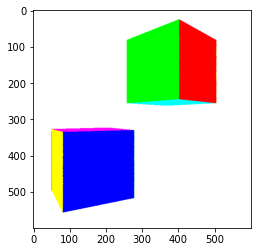

In [48]:
%%time
camera = Camera([-3,1,2], [0,-30,0], viewport_size = 1, projection_plane_z = 1)
canvas = Canvas(width=600, height=600)

planes = [
    Plane(Vertex(0,0,1),-1), #near
    Plane(Vertex(1/(math.sqrt(2)), 0, 1/(math.sqrt(2)))), # left
    Plane(Vertex(-1/(math.sqrt(2)), 0, 1/(math.sqrt(2)))), # right 
    Plane(Vertex( 0,1/(math.sqrt(2)), 1/(math.sqrt(2)))), # bottom
    Plane(Vertex( 0,-1/(math.sqrt(2)), 1/(math.sqrt(2)))) # top
]

vertices = [
    Vertex(1,1,1),
    Vertex(-1,1,1),
    Vertex(-1,-1,1),
    Vertex(1,-1,1),
    Vertex(1,1,-1),
    Vertex(-1,1,-1),
    Vertex(-1,-1,-1),
    Vertex(1,-1,-1)
]

triangles = [
    Triangle(0,1,2,(255,0,0)),
    Triangle(0,2,3,(255,0,0)),
    Triangle(4,0,3,(0,255,0)),
    Triangle(4,3,7,(0,255,0)),
    Triangle(5,4,7,(0,0,255)),
    Triangle(5,7,6,(0,0,255)),
    Triangle(1,5,6,(255,255,0)),
    Triangle(1,6,2,(255,255,0)),
    Triangle(4,5,1,(255,0,255)),
    Triangle(4,1,0,(255,0,255)),
    Triangle(2,6,7,(0,255,255)),
    Triangle(2,7,3,(0,255,255))
]

cube = Model(vertices, triangles)

bounding_sphere = Sphere(Vertex(0,0,0),math.sqrt(3))

instances = [
             Instance(copy.deepcopy(cube), [-1.5, 0, 7], [0,0,0], 0.75, bounding_sphere=copy.deepcopy(bounding_sphere)),
             Instance(copy.deepcopy(cube), [1.25, 2.5, 7.5], [0,195,0], bounding_sphere=copy.deepcopy(bounding_sphere)),
             Instance(copy.deepcopy(cube), [-1000, 100, -100], [0,0,0], bounding_sphere=copy.deepcopy(bounding_sphere))
            ]

scene = Scene(instances)

clipper = Clipper(camera = camera, scene=scene)
clipper.transform_instance()

clipped_scene = clipper.clip_scene(planes)
renderer = Renderer(camera=camera, scene=clipped_scene, canvas = canvas)
renderer.render_scene()
renderer.show()

Wall time: 257 ms


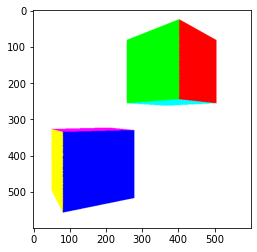

In [51]:
# using back face culling 

%%time
camera = Camera([-3,1,2], [0,-30,0], viewport_size = 1, projection_plane_z = 1)
canvas = Canvas(width=600, height=600)

planes = [
    Plane(Vertex(0,0,1),-1), #near
    Plane(Vertex(1/(math.sqrt(2)), 0, 1/(math.sqrt(2)))), # left
    Plane(Vertex(-1/(math.sqrt(2)), 0, 1/(math.sqrt(2)))), # right 
    Plane(Vertex( 0,1/(math.sqrt(2)), 1/(math.sqrt(2)))), # bottom
    Plane(Vertex( 0,-1/(math.sqrt(2)), 1/(math.sqrt(2)))) # top
]

vertices = [
    Vertex(1,1,1),
    Vertex(-1,1,1),
    Vertex(-1,-1,1),
    Vertex(1,-1,1),
    Vertex(1,1,-1),
    Vertex(-1,1,-1),
    Vertex(-1,-1,-1),
    Vertex(1,-1,-1)
]

triangles = [
    Triangle(0,1,2,(255,0,0)),
    Triangle(0,2,3,(255,0,0)),
    Triangle(4,0,3,(0,255,0)),
    Triangle(4,3,7,(0,255,0)),
    Triangle(5,4,7,(0,0,255)),
    Triangle(5,7,6,(0,0,255)),
    Triangle(1,5,6,(255,255,0)),
    Triangle(1,6,2,(255,255,0)),
    Triangle(4,5,1,(255,0,255)),
    Triangle(4,1,0,(255,0,255)),
    Triangle(2,6,7,(0,255,255)),
    Triangle(2,7,3,(0,255,255))
]

cube = Model(vertices, triangles)

bounding_sphere = Sphere(Vertex(0,0,0),math.sqrt(3))

instances = [
             Instance(copy.deepcopy(cube), [-1.5, 0, 7], [0,0,0], 0.75, bounding_sphere=copy.deepcopy(bounding_sphere)),
             Instance(copy.deepcopy(cube), [1.25, 2.5, 7.5], [0,195,0], bounding_sphere=copy.deepcopy(bounding_sphere)),
             Instance(copy.deepcopy(cube), [-1000, 100, -100], [0,0,0], bounding_sphere=copy.deepcopy(bounding_sphere))
            ]

scene = Scene(instances)

clipper = Clipper(camera = camera, scene=scene)
clipper.transform_instance()

clipped_scene = clipper.clip_scene(planes)
renderer = Renderer(camera=camera, scene=clipped_scene, canvas = canvas)
renderer.render_scene()
renderer.show()